# Analysis of food types

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the dataset
df_food = pd.read_csv('data/fooddf.csv')

display(df_food.head())

,ID,startdev,birth,weaning,juvenile,adult,pupa,death
0,Symsagittifera_roscoffensis,NaN,B,B,BA,BA,BA,NaN
1,Aequipecten_opercularis,NaN,P,P,P,P,P,NaN
2,Mimachlamys_varia,NaN,P,P,P,P,P,NaN
3,Mytilus_edulis,NaN,P,P,P,P,P,NaN
4,Panopea_abbreviata,NaN,P,P,H,H,H,NaN


we keep only birth and adult 

In [6]:
# Check for missing values and data types
print(df_food.info())
print(df_food.isnull().sum())

# lines with missing values in the 'adult' column
print(df_food[df_food['adult'].isnull()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1108 non-null   object 
 1   startdev  3 non-null      object 
 2   birth     1104 non-null   object 
 3   weaning   1104 non-null   object 
 4   juvenile  1100 non-null   object 
 5   adult     1098 non-null   object 
 6   pupa      1098 non-null   object 
 7   death     0 non-null      float64
dtypes: float64(1), object(7)
memory usage: 69.4+ KB
None
ID             0
startdev    1105
birth          4
weaning        4
juvenile       8
adult         10
pupa          10
death       1108
dtype: int64
                         ID startdev birth weaning juvenile adult pupa  death
321      Oncorhynchus_gilae      NaN     C       C      NaN   NaN  NaN    NaN
329              Umbra_limi      NaN     C       C      NaN   NaN  NaN    NaN
330           Umbra_krameri      NaN     C       C      NaN   N

10 species have missing values for the "adult" column and 4 for the "birth" column

### Filter columns

In [7]:
df_filtered = df_food[['ID', 'birth', 'adult']]
display(df_filtered.head())

,ID,birth,adult
0,Symsagittifera_roscoffensis,B,BA
1,Aequipecten_opercularis,P,P
2,Mimachlamys_varia,P,P
3,Mytilus_edulis,P,P
4,Panopea_abbreviata,P,H


### Plot

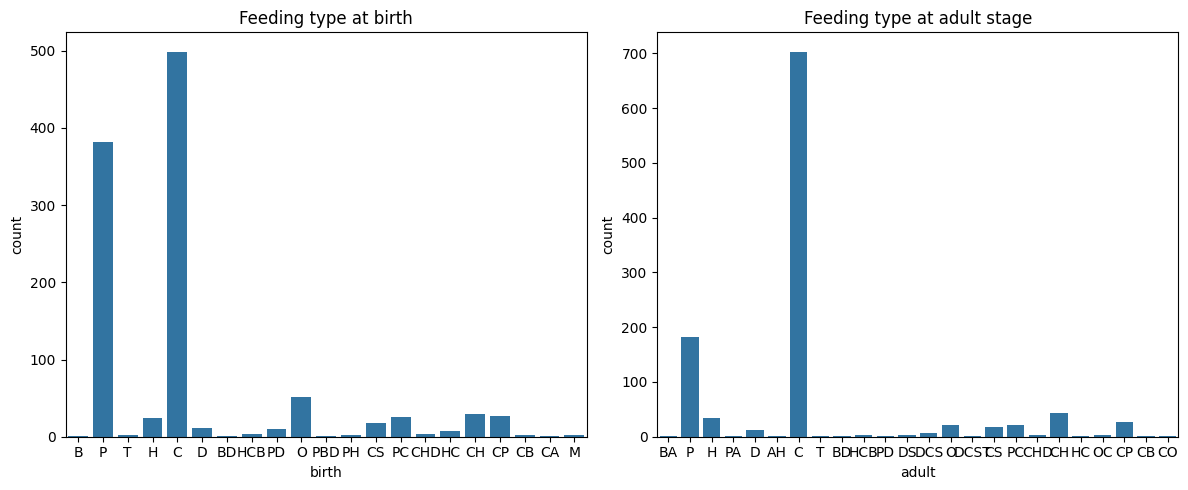

In [8]:
# Countplot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df_filtered, x="birth", ax=ax[0])
ax[0].set_title("Feeding type at birth")

sns.countplot(data=df_filtered, x="adult", ax=ax[1])
ax[1].set_title("Feeding type at adult stage")

plt.tight_layout()
plt.show()

## Transitions analysis

In [9]:
df_filtered = df_filtered.copy()

df_filtered["transition"] = df_filtered["birth"] + " → " + df_filtered["adult"]

# Create a table showing the count of each transition
transition_table = df_filtered["transition"].value_counts().reset_index()
transition_table.columns = ["Transition", "Count"]
display(transition_table)

# Missing values transition table
missing_transitions = df_filtered[df_filtered["transition"].isnull()]
print(missing_transitions)


,Transition,Count
0,C → C,480
1,P → P,177
2,P → C,176
3,CH → CH,27
4,CP → CP,27
5,O → C,27
6,O → O,22
7,H → H,22
8,CS → CS,18
9,D → D,11


                         ID birth adult transition
8         Mytilopsis_sallei   NaN     P        NaN
113  Congresox_talabonoides   NaN     C        NaN
114        Muraenesox_bagio   NaN     C        NaN
115     Muraenesox_cinereus   NaN     C        NaN
321      Oncorhynchus_gilae     C   NaN        NaN
329              Umbra_limi     C   NaN        NaN
330           Umbra_krameri     C   NaN        NaN
337        Allocyttus_niger    PC   NaN        NaN
338   Allocyttus_verrucosus    PC   NaN        NaN
339  Pseudocyttus_maculatus    PC   NaN        NaN
910    Chiromantis_petersii    HC   NaN        NaN
911   Chiromantis_rufescens    HC   NaN        NaN
914  Rhacophorus_moltrechti    HC   NaN        NaN
915  Zhangixalus_omeimontis    HC   NaN        NaN
